## Exercise 4: Correlations and preprocessing

Before we start applying machine learning algorithms, we want to have a look at further preprocessing and analyzing steps. To do so, this exercise will mainly deal with scaling, dimensionality reduction, correlation measures and the distribution of data points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('data/fifa_20.csv')#Change path according to your files

### correlation vs. causality

A common step in data analytics is to investigate correlations between variables. Sometimes these correlations might or might not be derivable from obvious causalities. Create scatter plots of the feature pair 'goalkeeping_handling' and 'goalkeeping_positioning' and the feature pair 'height_cm' and 'gk_speed'. Do not forget to name the axes of the plots and add suitable titles.

In addition, calculate and print the Pearson correlation of each feature pair (you can also add the correlation to the title of the plot for a better overview). For calculation, use for example:

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html

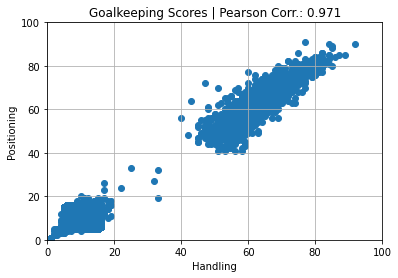

In [50]:
#First we calculate the pearson correlation for the sets of data

p_corr = df.goalkeeping_handling.corr(df.goalkeeping_positioning, method = 'pearson')

fig = plt.figure()
ax = plt.axes()
ax.scatter(df.goalkeeping_handling, df.goalkeeping_positioning)
ax.set(xlabel = "Handling", ylabel = "Positioning", title = "Goalkeeping Scores | Pearson Corr.: %1.3f" %p_corr)
ax.set(xlim=(0,100), ylim=(0,100))
ax.grid()

For these 2 features there is a graphical evidence of a linear relation between them and the Pearson correlation factor of 0.971 confirms the fact we have a positive linear correlation among these 2 variables as it is close to 1. That is, in other words, the highest the 'goalkeeping_handling' is, the higher the 'goalkeeping_position' is as well.

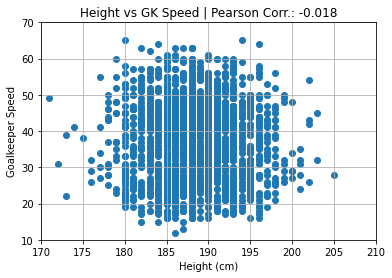

In [88]:
p_corr = df.height_cm.corr(df.gk_speed, method = 'pearson')

fig = plt.figure()
ax = plt.axes()
ax.scatter(df.height_cm, df.gk_speed)
ax.set(xlabel = "Height (cm)", ylabel = "Goalkeeper Speed", title = "Height vs GK Speed | Pearson Corr.: %1.3f" %p_corr)
ax.set(xlim=(170,210), ylim=(10,70))
ax.grid()

Now, regarding the 'height_cm' and the 'gk_speed' the scatter plot is not showing any identifiable pattern which is confirmed by the Pearson correlation of -0.018 which tells us that there is no linear dependence between those 2 features.

### investigate distributions

Create a histogram of the feature *defending* using 75 bins and the parameter *normed = True*. In addition, plot a normal distribution with the same mean and variance as line plot into the same diagram (it is recommended to use different colors).
For plotting the normal distribution you can use:

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html

https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

What do you observe?

[(0.0, 100.0)]

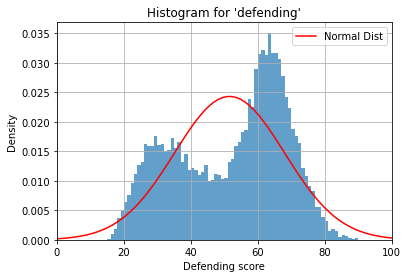

In [144]:
#TODO: Compute mean and standard deviation, plot both charts in one diagram, what can you see?

def_mean = np.mean(df.defending)
def_std_dev = np.std(df.defending)

x = np.linspace(def_mean-4*def_std_dev,def_mean+4*def_std_dev,100)
pdf = norm.pdf(x, def_mean, def_std_dev)

fig = plt.figure()
ax = plt.axes()
ax.hist(df.defending, bins = 75, density = True, stacked = True, alpha = 0.7)
ax.plot(x, pdf, 'r-', label='Normal Dist')
ax.set(title = "Histogram for 'defending'", xlabel="Defending score", ylabel="Density")
ax.legend()
ax.grid()
ax.set(xlim=(0,100))
#ax.set(xlabel = "Height (cm)", title = "Height vs GK Speed | Pearson Corr.: %1.3f" %p_corr)



It is visible that the distribution of the data for the 'defending' feature is not following a normal distribution. It has 2 values for which there are more players having the same scores: around ~30 and around ~65 and because of that, there is a different behaviour of the set of data when comparing it to the normal distribution with the same mean and variance that the registered data for the 'defending' variable. 